In [6]:
import os
from p1_uml_util import *
import seaborn as sns
import matplotlib.pyplot as plt

# Parte B
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import silhouette_score

# Parte C
from sklearn.ensemble import IsolationForest

# Parte D
from sklearn.decomposition import PCA



In [7]:
def prepare_data():
    script_path = script_path = os.getcwd()
    data_path = os.path.join(script_path, "data")
    file_path = os.path.join(data_path, "data.csv")
    _df = read_csv_file(file_path)
    # _df.set_index(lb_timestamp, inplace=True)
    print(_df.dtypes)
    return _df

In [8]:
def plot_data(_df: pd.DataFrame, lb1, lb2, legend):
    import matplotlib.pyplot as plt
    df_to_plot = _df.tail(1000)
    plt.plot(df_to_plot.index, df_to_plot[lb1], label=alias[lb_V005_vent01_CO2])
    plt.plot(df_to_plot.index, df_to_plot[lb2], label=alias[lb_V022_vent02_CO2])
    plt.xlabel(lb_timestamp)
    plt.ylabel(legend)
    plt.legend()
    plt.show()

timestamp                object
V005_vent01_CO2         float64
V022_vent02_CO2         float64
V006_vent01_temp_out    float64
V023_vent02_temp_out    float64
dtype: object
              timestamp  V005_vent01_CO2  V022_vent02_CO2  \
0      23.06.2012 01:00       494.172532       405.514287   
1      23.06.2012 02:00       491.992574       404.705170   
2      23.06.2012 03:00       490.003467       401.981443   
3      23.06.2012 04:00       490.972327       402.471192   
4      23.06.2012 05:00       489.132106       403.174487   
...                 ...              ...              ...   
25937  08.06.2015 19:00       624.063257       533.007180   
25938  08.06.2015 20:00       621.028671       523.581086   
25939  08.06.2015 21:00       617.569761       518.422520   
25940  08.06.2015 22:00       615.949610       516.342616   
25941  08.06.2015 23:00       613.708765       512.382790   

       V006_vent01_temp_out  V023_vent02_temp_out  
0                 22.700000             2

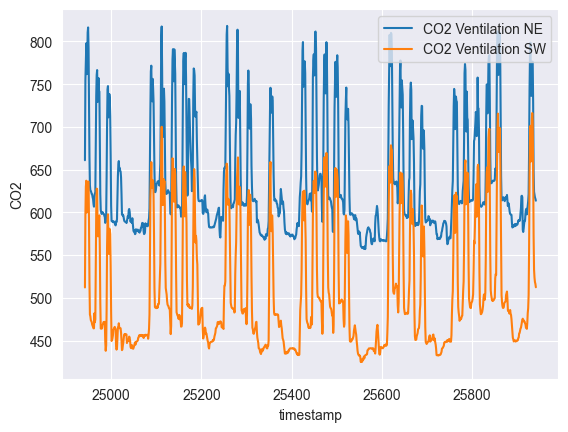

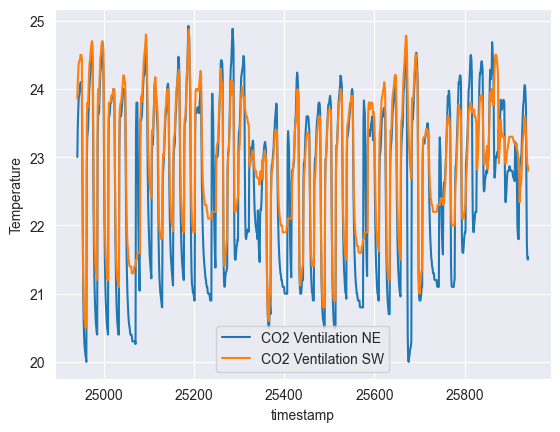

In [9]:
if __name__ == "__main__":
    df = prepare_data()
    print(df)
    plot_data(df, lb_V005_vent01_CO2, lb_V022_vent02_CO2, "CO2")
    plot_data(df, lb_V006_vent01_temp_out, lb_V023_vent02_temp_out, "Temperature")

In [10]:
df.describe()

,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out
count,25942.000000,25942.000000,25941.000000,25941.000000
mean,651.744240,497.431146,21.345815,21.876474
std,101.078259,75.843643,2.219332,1.954422
min,448.086428,362.612365,0.000000,6.749889
25%,580.649750,440.735256,20.100000,21.000000
50%,620.179955,472.686925,22.084667,22.330583
75%,709.237826,543.404515,22.934306,23.231082
max,1369.095839,853.762769,26.886944,27.200000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25942 entries, 0 to 25941
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             25942 non-null  object 
 1   V005_vent01_CO2       25942 non-null  float64
 2   V022_vent02_CO2       25942 non-null  float64
 3   V006_vent01_temp_out  25941 non-null  float64
 4   V023_vent02_temp_out  25941 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1013.5+ KB


In [12]:
# Eliminar filas con NaN
df_cleaned = df.dropna()

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25941 entries, 0 to 25941
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             25941 non-null  object 
 1   V005_vent01_CO2       25941 non-null  float64
 2   V022_vent02_CO2       25941 non-null  float64
 3   V006_vent01_temp_out  25941 non-null  float64
 4   V023_vent02_temp_out  25941 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


In [14]:
# Variables con las que se trabajará
variables = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']

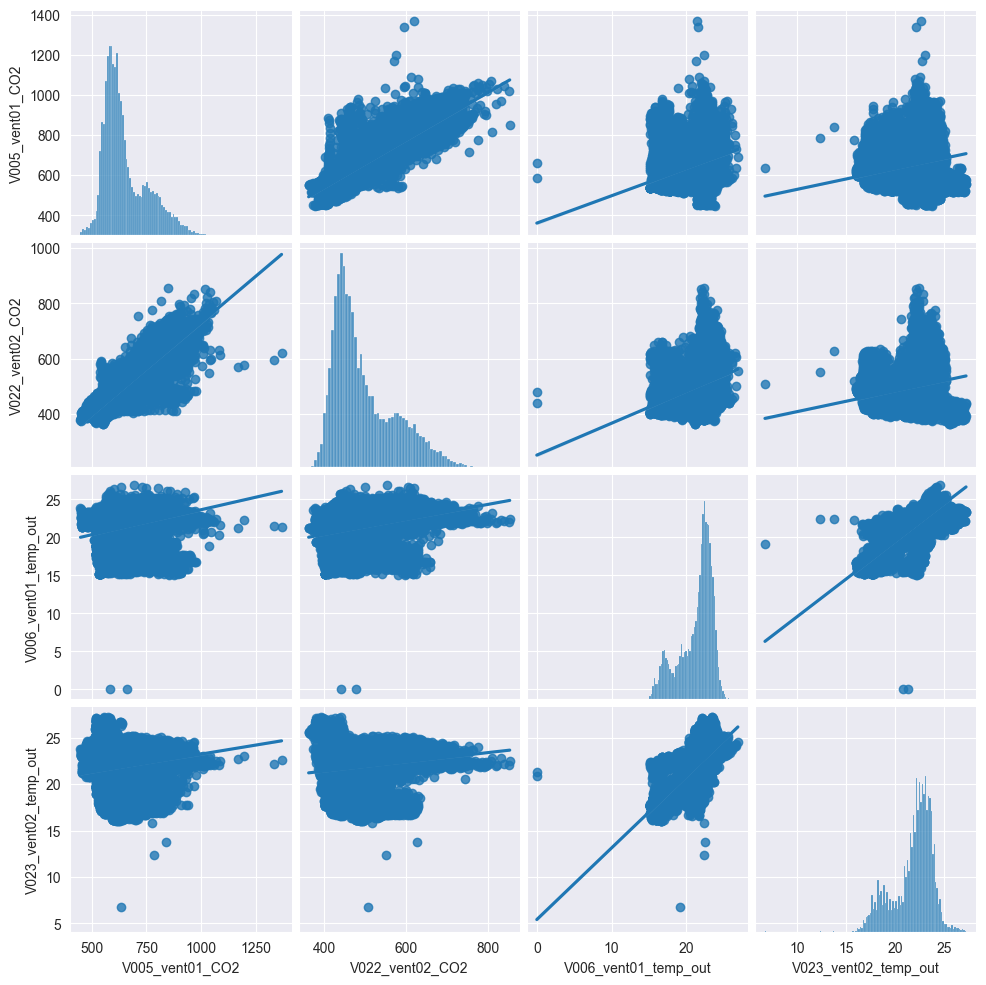

In [15]:
sns.pairplot(df_cleaned[variables], kind = 'reg', vars = variables)

## LITERAL A

In [16]:
# Se convierte la columna timestamp a formato de fecha y hora 
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
# Se crea una columna 'day' que contiene solo el día (sin hora)
df_cleaned['day'] = df_cleaned['timestamp'].dt.day_of_year
# Se crea una columna 'semana' que contiene la semana
df_cleaned['semana'] = df_cleaned['timestamp'].dt.weekday
# Se extrae la hora del día para cada registro, creando una columna 'hour' que contiene solo la hora (sin fecha)
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour
print (df_cleaned['day'])
print (df_cleaned['hour'])
print(df_cleaned)

# # Variables con las que se trabajará
# variables = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']

# Se define una paleta de 24 colores diferentes (uno para cada hora) 
palette = sns.color_palette('Spectral', n_colors = 24) 

# Generar gráficos de boxplot por cada variable
def plot_variables_per_day(df_data, variables):
    for var in variables:
        plt.figure(figsize = (12, 6))
        sns.set_style("darkgrid")  # Fondo gris con grid
        sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})
        plt.title(f'Boxplot de {var} por hora del día')
        plt.xlabel('Hora del día')
        plt.ylabel(var)
        plt.xticks(range(0, 24))  # Asegurarse de que las horas estén de 0 a 23
        plt.show()


0        175
1        175
2        175
3        175
4        175
        ... 
25937    159
25938    159
25939    159
25940    159
25941    159
Name: day, Length: 25941, dtype: int32
0         1
1         2
2         3
3         4
4         5
         ..
25937    19
25938    20
25939    21
25940    22
25941    23
Name: hour, Length: 25941, dtype: int32
                timestamp  V005_vent01_CO2  V022_vent02_CO2  \
0     2012-06-23 01:00:00       494.172532       405.514287   
1     2012-06-23 02:00:00       491.992574       404.705170   
2     2012-06-23 03:00:00       490.003467       401.981443   
3     2012-06-23 04:00:00       490.972327       402.471192   
4     2012-06-23 05:00:00       489.132106       403.174487   
...                   ...              ...              ...   
25937 2015-06-08 19:00:00       624.063257       533.007180   
25938 2015-06-08 20:00:00       621.028671       523.581086   
25939 2015-06-08 21:00:00       617.569761       518.422520   
25940 2015-06-08

C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1153376.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1153376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1153376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1153376.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


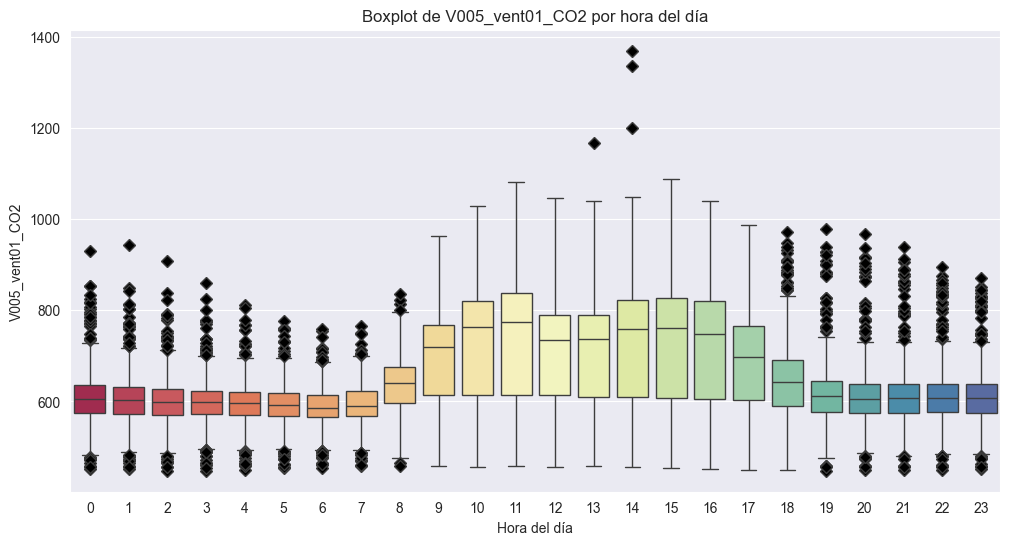

C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1153376.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


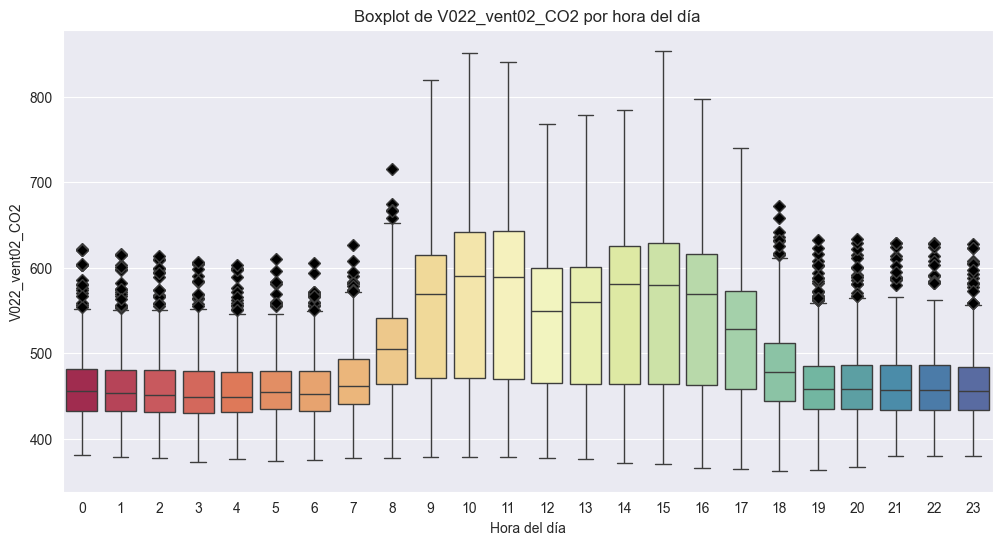

C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1153376.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


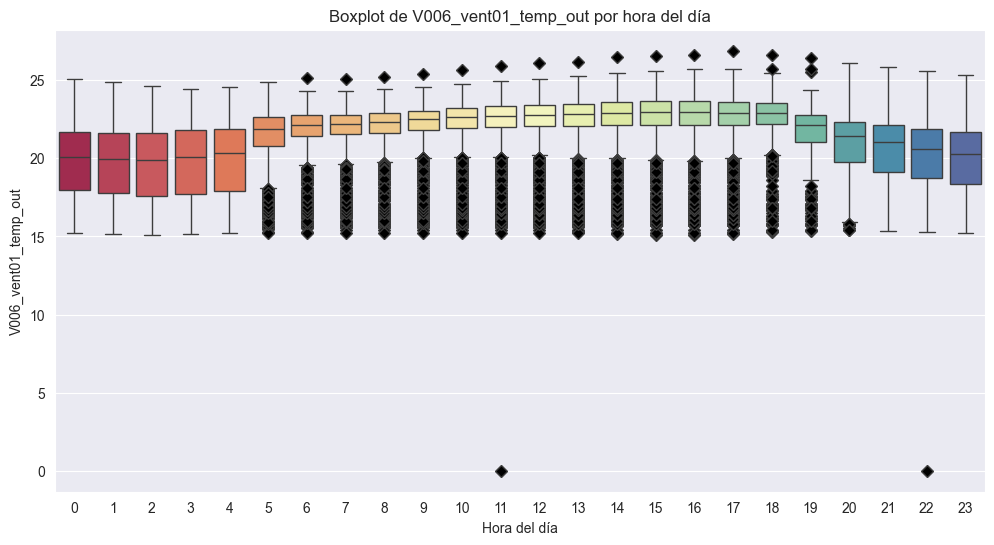

C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1153376.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hour', y = var, data = df_data, palette = palette, flierprops = {'marker': 'D', 'markersize' : 6, 'markerfacecolor' : 'black'})


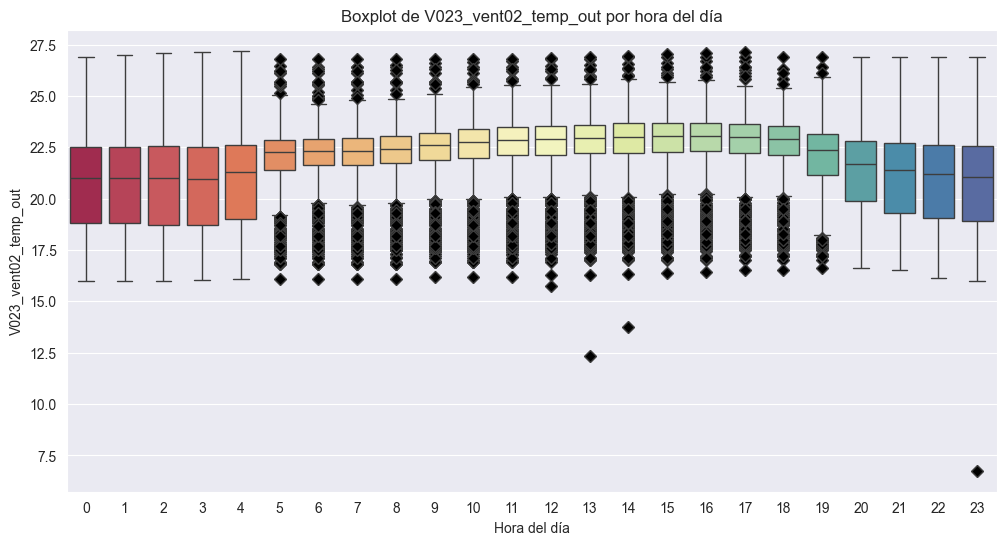

In [17]:
plot_variables_per_day(df_cleaned, variables)

## LITERAL B

### Método 1: GMM

In [18]:
scaler = StandardScaler()
# Función para aplicar GMM a cada variable
def apply_gmm(variable_data, n_components = 4):
    # Escalar los datos
    variable_scaled = scaler.fit_transform(variable_data.values.reshape(-1, 1))
    
    # Se crea y ajusta el GMM
    gmm = GaussianMixture(n_components = n_components, random_state = 42)
    gmm.fit(variable_scaled)
    
    # Se predicen las etiquetas 
    labels_gmm = gmm.predict(variable_scaled)
    # Se obtiene probabilidades
    probabilities = gmm.predict_proba(variable_scaled)
    
    return labels_gmm, probabilities

In [19]:
# Se crea un diccionario para almacenar los resultados de GMM
gmm_results = {}

# Aplicar GMM para cada variable
for var in variables:
    print(f'Aplicando GMM para {var}')
    labels_gmm, probabilities = apply_gmm(df_cleaned[var])
    gmm_results[var] = {
        'labels': labels_gmm,
        'probabilities': probabilities
    }
    # Agregar las etiquetas al dataframe original
    df_cleaned[f'{var}_labels'] = labels_gmm

df_cleaned    

Aplicando GMM para V005_vent01_CO2
Aplicando GMM para V022_vent02_CO2


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\3753988182.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'{var}_labels'] = labels_gmm
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\3753988182.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'{var}_labels'] = labels_gmm
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\3753988182.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Aplicando GMM para V006_vent01_temp_out
Aplicando GMM para V023_vent02_temp_out


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\3753988182.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'{var}_labels'] = labels_gmm


,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,day,semana,hour,V005_vent01_CO2_labels,V022_vent02_CO2_labels,V006_vent01_temp_out_labels,V023_vent02_temp_out_labels
0,2012-06-23 01:00:00,494.172532,405.514287,22.700000,23.449972,175,5,1,0,0,0,0
1,2012-06-23 02:00:00,491.992574,404.705170,22.700000,23.400000,175,5,2,0,0,0,0
2,2012-06-23 03:00:00,490.003467,401.981443,22.628444,23.400000,175,5,3,0,0,3,0
3,2012-06-23 04:00:00,490.972327,402.471192,22.600000,23.400000,175,5,4,0,0,3,0
4,2012-06-23 05:00:00,489.132106,403.174487,22.600000,23.349972,175,5,5,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25937,2015-06-08 19:00:00,624.063257,533.007180,22.557156,23.154668,159,0,19,2,3,3,2
25938,2015-06-08 20:00:00,621.028671,523.581086,21.732667,23.009318,159,0,20,2,2,3,2
25939,2015-06-08 21:00:00,617.569761,518.422520,21.530667,22.900015,159,0,21,2,2,3,2
25940,2015-06-08 22:00:00,615.949610,516.342616,21.500000,22.867806,159,0,22,2,2,3,2


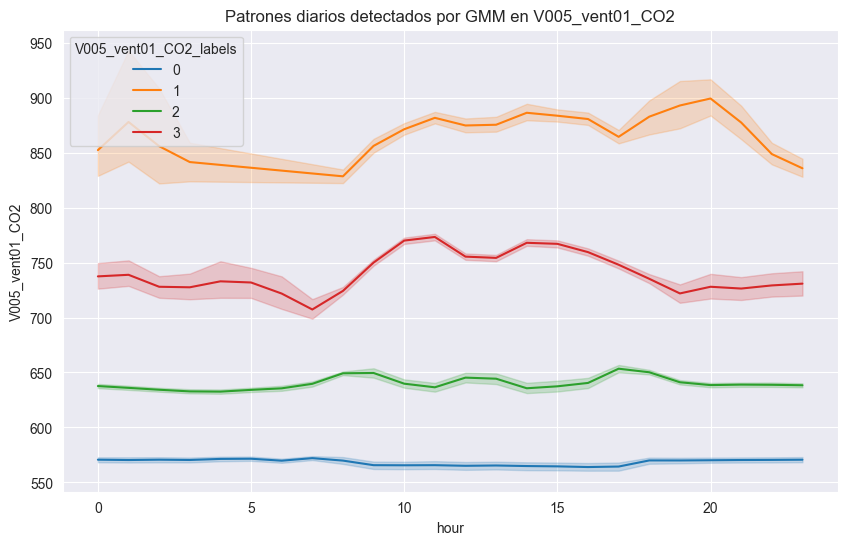

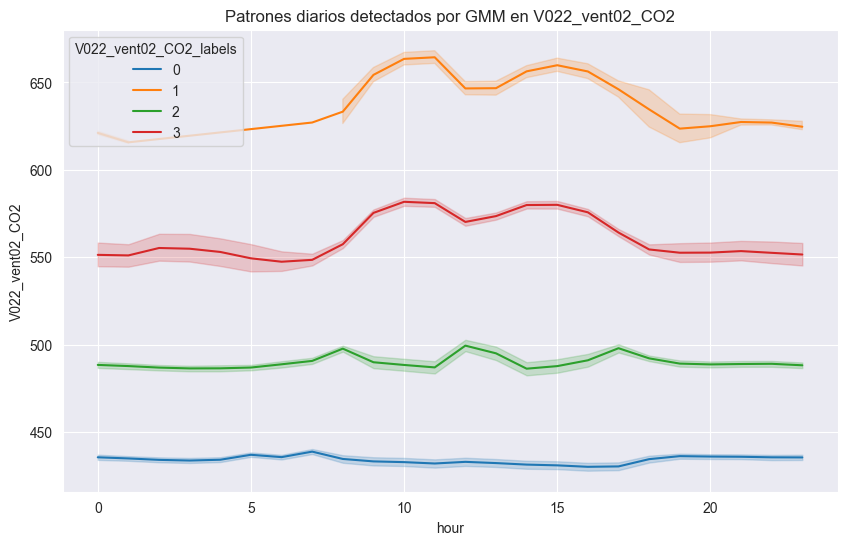

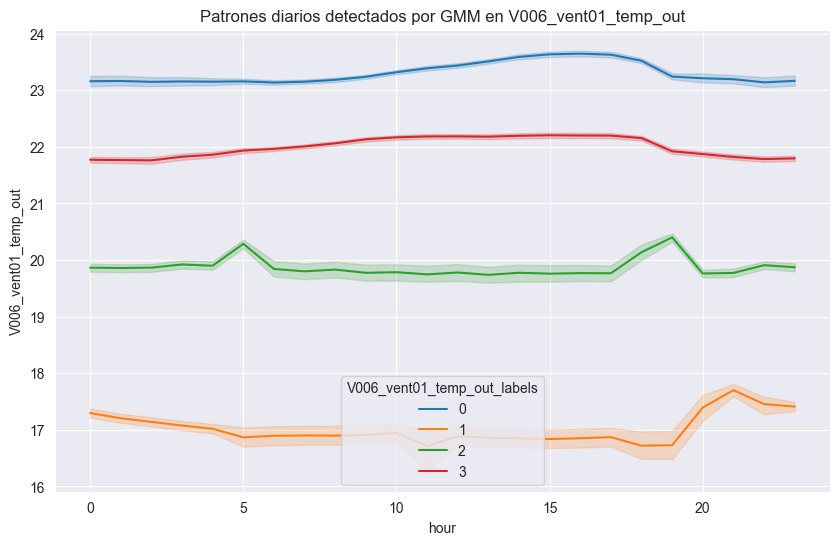

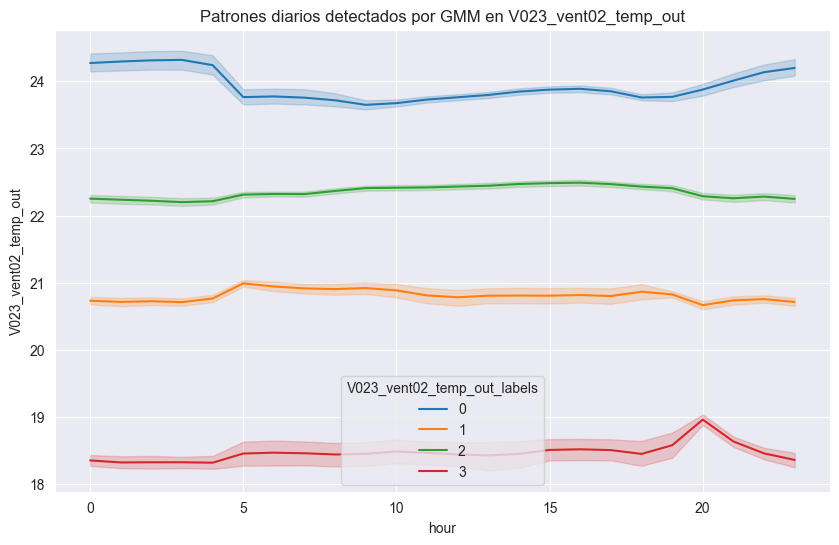

In [20]:
# Graficar resultados para cada variable
for var in variables:
    plt.figure(figsize = (10, 6))
    sns.lineplot(data = df_cleaned, x = 'hour', y = var, hue = f'{var}_labels', palette = 'tab10')
    plt.title(f'Patrones diarios detectados por GMM en {var}')
    plt.show()

In [21]:
# Contar el número de muestras por grupo en GMM para cada variable
for var in variables:
    group_counts = df_cleaned[f'{var}_labels'].value_counts()
    print(f"Conteo de muestras por grupo para {var}:")
    print(group_counts)
    print("\n")

Conteo de muestras por grupo para V005_vent01_CO2:
V005_vent01_CO2_labels
0    11077
2     7729
3     4926
1     2209
Name: count, dtype: int64


Conteo de muestras por grupo para V022_vent02_CO2:
V022_vent02_CO2_labels
0    11304
2     7239
3     4744
1     2654
Name: count, dtype: int64


Conteo de muestras por grupo para V006_vent01_temp_out:
V006_vent01_temp_out_labels
3    9305
0    8267
2    4461
1    3908
Name: count, dtype: int64


Conteo de muestras por grupo para V023_vent02_temp_out:
V023_vent02_temp_out_labels
2    11386
0     6891
3     4678
1     2986
Name: count, dtype: int64




In [22]:
for var in variables:
    # Escalar los datos
    variable_scaled = scaler.fit_transform(df_cleaned[var].values.reshape(-1, 1))

    # Evaluar diferentes números de componentes usando BIC y AIC
    bic_scores_dict = {}
    aic_scores_dict = {}
    silhouette_scores_dict = {}


    for n_components in range(2, 9):
        gmm = GaussianMixture(n_components = n_components, random_state = 42)
        gmm.fit(variable_scaled)
        
        # Se calcula BIC y AIC
        BIC = gmm.bic(variable_scaled)
        bic_scores_dict[n_components] = BIC
        AIC = gmm.aic(variable_scaled)
        aic_scores_dict[n_components] = AIC
        
        # Se calcula Silhouette Score
        labels_gmm = gmm.predict(variable_scaled)
        silhouette_avg = silhouette_score(variable_scaled, labels_gmm)
        silhouette_scores_dict[n_components] = silhouette_avg
        print(f'Para {var}: n_components = {n_components} -> índice de silueta = {silhouette_avg:.3f}, BIC = {BIC:.3f}, AIC = {AIC:.3f}') 
    
    best_k = max(silhouette_scores_dict, key = silhouette_scores_dict.get) 
    best_n_components_bic = min(bic_scores_dict, key = bic_scores_dict.get) 
    best_n_components_aic = min(aic_scores_dict, key = aic_scores_dict.get) 
    
    # Mostrar resultados
    print(f'Mejor número de clusters según el índice de silueta: {best_k}')
    print(f'Mejor número de clusters según BIC: {best_n_components_bic}')
    print(f'Mejor número de clusters según AIC: {best_n_components_aic}')
    print('\n___________________________________________________________________________________________________\n')  

Para V005_vent01_CO2: n_components = 2 -> índice de silueta = 0.683, BIC = 64401.472, AIC = 64360.654
Para V005_vent01_CO2: n_components = 3 -> índice de silueta = 0.484, BIC = 64574.487, AIC = 64509.178
Para V005_vent01_CO2: n_components = 4 -> índice de silueta = 0.538, BIC = 64513.773, AIC = 64423.974
Para V005_vent01_CO2: n_components = 5 -> índice de silueta = 0.504, BIC = 64515.583, AIC = 64401.293
Para V005_vent01_CO2: n_components = 6 -> índice de silueta = 0.513, BIC = 64539.419, AIC = 64400.638
Para V005_vent01_CO2: n_components = 7 -> índice de silueta = 0.516, BIC = 64471.795, AIC = 64308.523
Para V005_vent01_CO2: n_components = 8 -> índice de silueta = 0.510, BIC = 64379.710, AIC = 64191.948
Mejor número de clusters según el índice de silueta: 2
Mejor número de clusters según BIC: 8
Mejor número de clusters según AIC: 8

___________________________________________________________________________________________________

Para V022_vent02_CO2: n_components = 2 -> índice de s

### Por simplicidad y para evitar el sobreajuste nos quedaremos con el número de componentes recomendado por BIC

### Se aplicará GMM con n_components recomendado solo para dos de las variables para visualizar su resultado. Tomaremos las variables: V022_vent02_CO2 y V006_vent01_temp_out 

C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\2055326306.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['V022_vent02_CO2_labels'] = labels_gmm


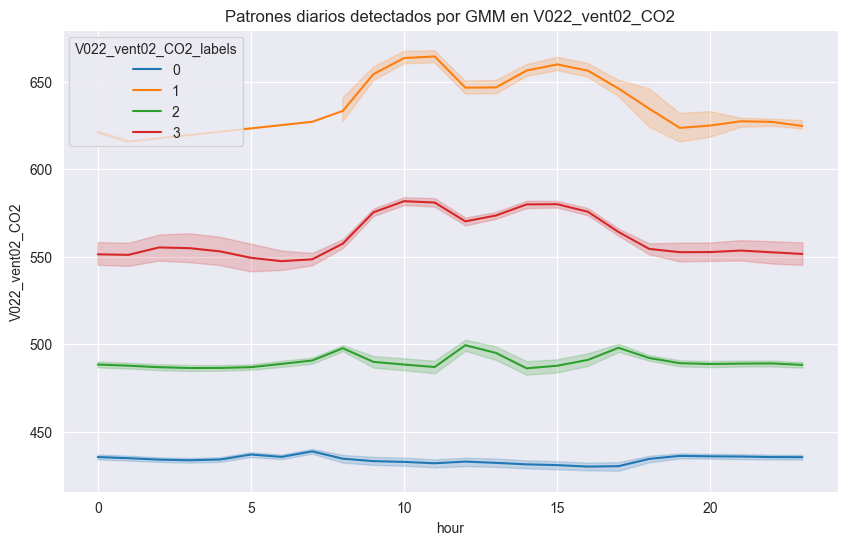

In [23]:
# Para V022_vent02_CO2
variable_scaled = scaler.fit_transform(df_cleaned['V022_vent02_CO2'].values.reshape(-1, 1))
 
gmm = GaussianMixture(n_components = 4, random_state = 42)
gmm.fit(variable_scaled)
labels_gmm = gmm.predict(variable_scaled)
probabilities = gmm.predict_proba(variable_scaled)
df_cleaned['V022_vent02_CO2_labels'] = labels_gmm

plt.figure(figsize = (10, 6))
sns.lineplot(data = df_cleaned, x = 'hour', y = 'V022_vent02_CO2', hue = 'V022_vent02_CO2_labels', palette = 'tab10')
plt.title('Patrones diarios detectados por GMM en V022_vent02_CO2')
plt.show()

In [24]:
# Contar el número de muestras por grupo en GMM para V022_vent02_CO2
group_counts = df_cleaned['V022_vent02_CO2_labels'].value_counts()
print(f"Conteo de muestras por grupo para V022_vent02_CO2:")
print(group_counts)
print("\n")

Conteo de muestras por grupo para V022_vent02_CO2:
V022_vent02_CO2_labels
0    11304
2     7239
3     4744
1     2654
Name: count, dtype: int64




C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1577740998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['V006_vent01_temp_out_labels'] = labels_gmm


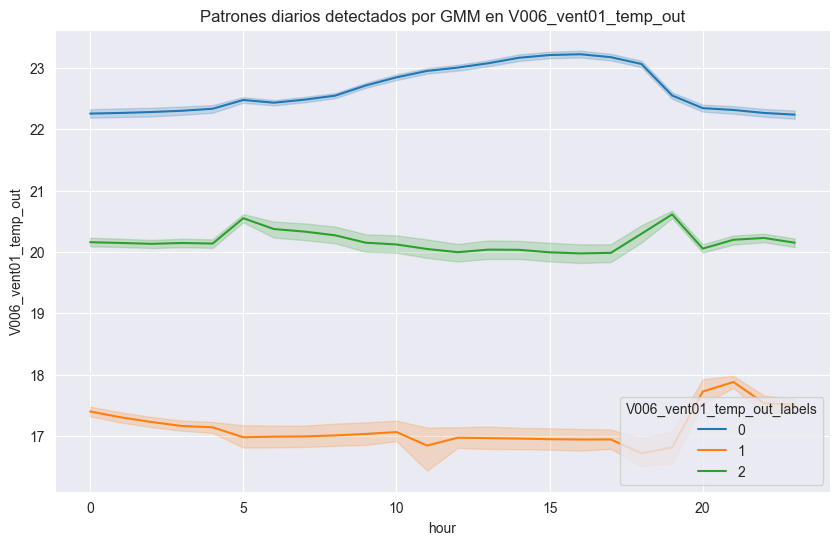

In [25]:
# Para V006_vent01_temp_out 
variable_scaled = scaler.fit_transform(df_cleaned['V006_vent01_temp_out'].values.reshape(-1, 1))
 
gmm = GaussianMixture(n_components = 3, random_state = 42)
gmm.fit(variable_scaled)
labels_gmm = gmm.predict(variable_scaled)
probabilities = gmm.predict_proba(variable_scaled)
df_cleaned['V006_vent01_temp_out_labels'] = labels_gmm

plt.figure(figsize = (10, 6))
sns.lineplot(data = df_cleaned, x = 'hour', y = 'V006_vent01_temp_out', hue = 'V006_vent01_temp_out_labels', palette = 'tab10')
plt.title('Patrones diarios detectados por GMM en V006_vent01_temp_out')
plt.show()

In [26]:
# Contar el número de muestras por grupo en GMM para V006_vent01_temp_out
group_counts = df_cleaned['V006_vent01_temp_out_labels'].value_counts()
print(f"Conteo de muestras por grupo para V006_vent01_temp_out:")
print(group_counts)
print("\n")

Conteo de muestras por grupo para V006_vent01_temp_out:
V006_vent01_temp_out_labels
0    16567
2     5157
1     4217
Name: count, dtype: int64




# _________________________________________________

### Método 2: K-Means

In [27]:
# Se normalizan los datos para el análisis de clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[variables])
scaled_data

array([[-1.558955  , -1.21196732,  0.61018861,  0.80511209],
       [-1.58052228, -1.22263567,  0.61018861,  0.77954279],
       [-1.60020138, -1.25854844,  0.57794606,  0.77954279],
       ...,
       [-0.33813246,  0.27674595,  0.08329328,  0.52371543],
       [-0.35416133,  0.24932209,  0.06947505,  0.50723484],
       [-0.37633098,  0.19711114,  0.08462838,  0.47254075]])



#### Para determinar el número ideal de clusters para cada variable, vamos a utilizar el índice de silueta, el cual evalúa qué tan bien separadas están las muestras dentro de sus clusters. Un valor más cercano a 1 indica que la separación es mejor.

In [28]:
# Se calcula la métrica índice de silueta para varios valores de k
var = ''
for col in range(scaled_data.shape[1]):
    if col == 0:
        var = 'V005_vent01_CO2' 
    elif col == 1:
        var = 'V022_vent02_CO2'
    elif col == 2:
        var = 'V006_vent01_temp_out'
    elif col == 3:            
        var = 'V023_vent02_temp_out'

    silhouette_scores_dict= {}
    for k in range(2, 8):
        kmeans_prueba = KMeans(n_clusters = k, random_state = 42)        
        kmeans_labels_prueba = kmeans_prueba.fit_predict(scaled_data[:, col].reshape(-1, 1))
        silhouette_avg = silhouette_score(scaled_data[:, col].reshape(-1, 1), kmeans_labels_prueba) 
        silhouette_scores_dict[k] = silhouette_avg
        print(f'Para: {var} con k = {k} -> índice de silueta = {silhouette_avg:.3f}')
    best_k = max(silhouette_scores_dict, key = silhouette_scores_dict.get)    
    print(f'Mejor número de clusters: {best_k}')
    print('\n___________________________________________________________________________________________________\n')   

Para: V005_vent01_CO2 con k = 2 -> índice de silueta = 0.687
Para: V005_vent01_CO2 con k = 3 -> índice de silueta = 0.546
Para: V005_vent01_CO2 con k = 4 -> índice de silueta = 0.543
Para: V005_vent01_CO2 con k = 5 -> índice de silueta = 0.520
Para: V005_vent01_CO2 con k = 6 -> índice de silueta = 0.518
Para: V005_vent01_CO2 con k = 7 -> índice de silueta = 0.524
Mejor número de clusters: 2

___________________________________________________________________________________________________

Para: V022_vent02_CO2 con k = 2 -> índice de silueta = 0.679
Para: V022_vent02_CO2 con k = 3 -> índice de silueta = 0.575
Para: V022_vent02_CO2 con k = 4 -> índice de silueta = 0.556
Para: V022_vent02_CO2 con k = 5 -> índice de silueta = 0.543
Para: V022_vent02_CO2 con k = 6 -> índice de silueta = 0.526
Para: V022_vent02_CO2 con k = 7 -> índice de silueta = 0.530
Mejor número de clusters: 2

___________________________________________________________________________________________________

Para: V0

In [29]:
# K-Means clustering
def kmeans_clustering(scaled_data):
    kmeans = KMeans(n_clusters = 2)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    return kmeans_labels

### Se aplica K-Means a cada variable por separado

In [30]:
var = ''
for col in range(scaled_data.shape[1]):
    if col == 0:
        var = 'V005_vent01_CO2' 
    elif col == 1:
        var = 'V022_vent02_CO2'
    elif col == 2:
        var = 'V006_vent01_temp_out'
    elif col == 3:            
        var = 'V023_vent02_temp_out'
    
    # Se obtiene el array de etiquetas para cada variable utilizando K-Means como método de clustering
    LABELS_KMEANS = kmeans_clustering(scaled_data[:, col].reshape(-1, 1))
    # Se obtiene los valores únicos de etiqueta para cada variable
    valores_unicos_kmeans = np.unique(LABELS_KMEANS)
    # Se cuenta el número de valores únicos para cada variable
    num_valores_unicos_kmeans = len(valores_unicos_kmeans)
    print(f'Para la variable {var} tenemos {num_valores_unicos_kmeans} etiquetas diferentes que son: {valores_unicos_kmeans}')
    # Se agregan los resultados de K-Means clustering de cada variable al dataframe
    df_cleaned['KMeans_cluster_' + var] = LABELS_KMEANS

df_cleaned

Para la variable V005_vent01_CO2 tenemos 2 etiquetas diferentes que son: [0 1]
Para la variable V022_vent02_CO2 tenemos 2 etiquetas diferentes que son: [0 1]
Para la variable V006_vent01_temp_out tenemos 2 etiquetas diferentes que son: [0 1]
Para la variable V023_vent02_temp_out tenemos 2 etiquetas diferentes que son: [0 1]


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1240821143.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['KMeans_cluster_' + var] = LABELS_KMEANS
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1240821143.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['KMeans_cluster_' + var] = LABELS_KMEANS
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1240821143.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,day,semana,hour,V005_vent01_CO2_labels,V022_vent02_CO2_labels,V006_vent01_temp_out_labels,V023_vent02_temp_out_labels,KMeans_cluster_V005_vent01_CO2,KMeans_cluster_V022_vent02_CO2,KMeans_cluster_V006_vent01_temp_out,KMeans_cluster_V023_vent02_temp_out
0,2012-06-23 01:00:00,494.172532,405.514287,22.700000,23.449972,175,5,1,0,0,0,0,1,0,0,0
1,2012-06-23 02:00:00,491.992574,404.705170,22.700000,23.400000,175,5,2,0,0,0,0,1,0,0,0
2,2012-06-23 03:00:00,490.003467,401.981443,22.628444,23.400000,175,5,3,0,0,0,0,1,0,0,0
3,2012-06-23 04:00:00,490.972327,402.471192,22.600000,23.400000,175,5,4,0,0,0,0,1,0,0,0
4,2012-06-23 05:00:00,489.132106,403.174487,22.600000,23.349972,175,5,5,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,2015-06-08 19:00:00,624.063257,533.007180,22.557156,23.154668,159,0,19,2,3,0,2,1,1,0,0
25938,2015-06-08 20:00:00,621.028671,523.581086,21.732667,23.009318,159,0,20,2,2,0,2,1,0,0,0
25939,2015-06-08 21:00:00,617.569761,518.422520,21.530667,22.900015,159,0,21,2,2,0,2,1,0,0,0
25940,2015-06-08 22:00:00,615.949610,516.342616,21.500000,22.867806,159,0,22,2,2,0,2,1,0,0,0


In [31]:
# # Se grafica los patrones univariables detectados por K-Means
# for var in variables:   
#     sns.pairplot(df_cleaned, hue = ('KMeans_cluster_' + var), height = 2, palette = 'bright', vars = variables + ['hour'])

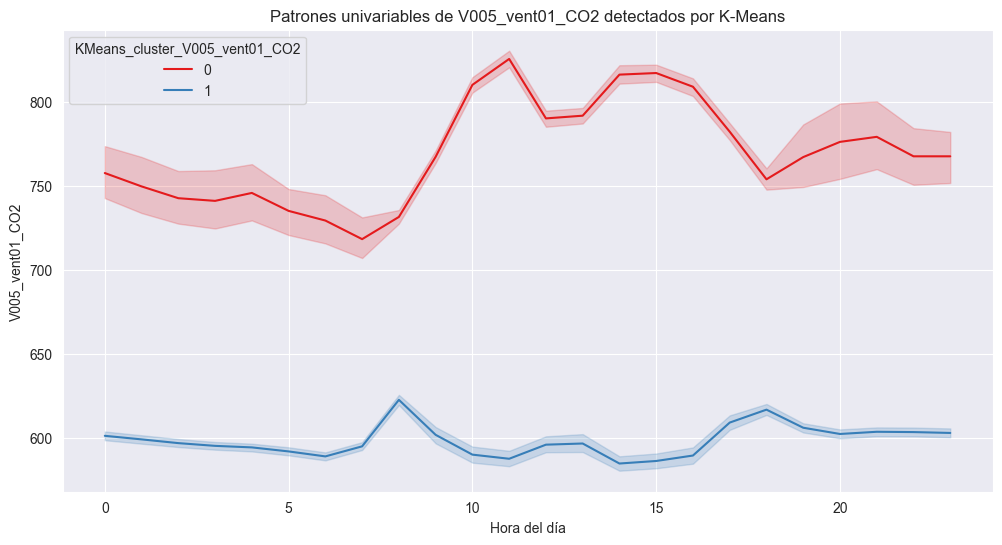

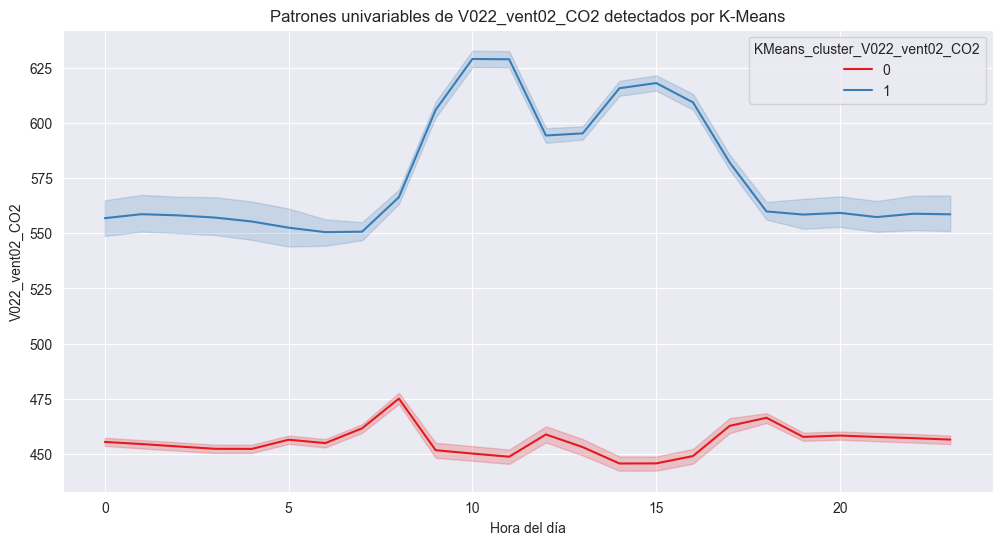

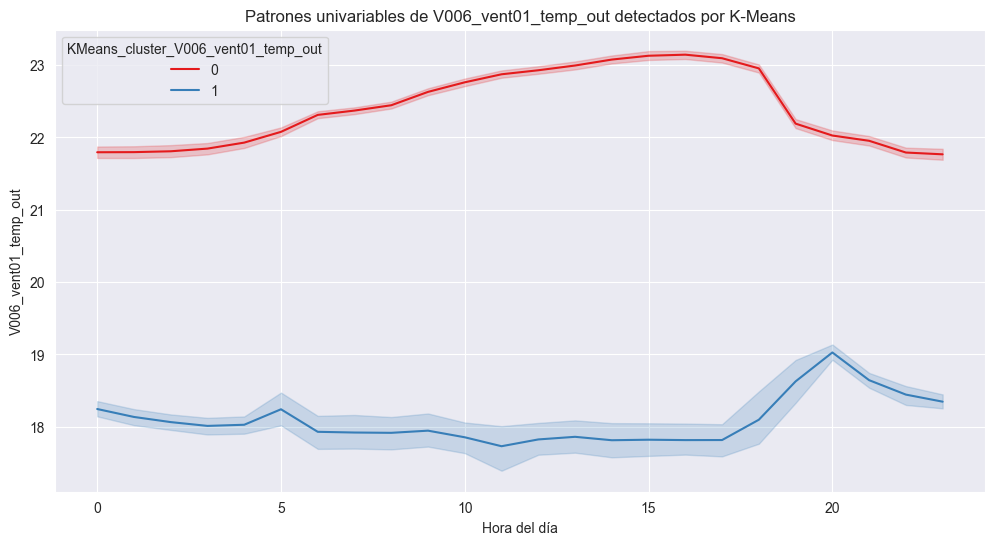

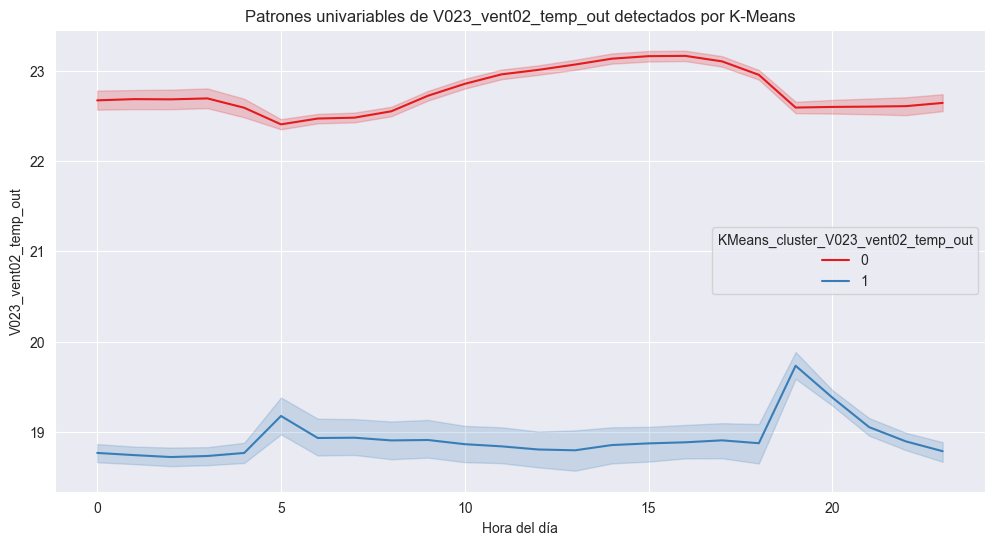

In [32]:
# Graficar los patrones univariables detectados por K-Means
for var in variables:
    plt.figure(figsize = (12, 6))
    sns.lineplot(x = 'hour', y = var, hue = 'KMeans_cluster_' + var, data = df_cleaned, palette = 'Set1')
    # sns.lineplot(data = df_cleaned, x = 'hour', y = var, hue = f'{var}_labels', palette = 'tab10')
    plt.title(f'Patrones univariables de {var} detectados por K-Means')
    plt.xlabel('Hora del día')
    plt.ylabel(var)
    plt.show()

### Método 3: DBSCAN

#### Los parámetros de DBSCAN (eps y in_samples) se ajustan según la densidad de los datos. Vamos a realizar un GridSearch para probar diferentes combinaciones de los parámetros y evaluar los resultados, usando nuevamente el índice de silueta como métrica para seleccionar la mejor combinación. Los mejores parámetros serán aquellos que maximicen el índice de silueta.

In [33]:
# var = ''
# for col in range(scaled_data.shape[1]):
#     if col == 0:
#         var = 'V005_vent01_CO2' 
#     elif col == 1:
#         var = 'V022_vent02_CO2'
#     elif col == 2:
#         var = 'V006_vent01_temp_out'
#     elif col == 3:            
#         var = 'V023_vent02_temp_out'

#     # Se prueba distintos valores de eps y min_samples
#     eps_values = [0.5,1.0, 1.2, 1.3, 1.5]
#     min_samples_values = [2, 3, 5, 7]

#     best_eps = None
#     best_min_samples = None
#     best_silhouette = -1

#     for eps in eps_values:
#         for min_samples in min_samples_values:
#             dbscan = DBSCAN(eps = eps, min_samples = min_samples)
#             dbscan_labels = dbscan.fit_predict(scaled_data[:, col].reshape(-1, 1))
#             if len(set(dbscan_labels)) > 1:  # Asegurarse de que haya más de un cluster
#                 silhouette_avg = silhouette_score(scaled_data[:, col].reshape(-1, 1), dbscan_labels)
#                 print(f"DBSCAN: eps = {eps}, min_samples = {min_samples}, índice de silueta = { silhouette_avg:.4f}")
#                 if silhouette_avg > best_silhouette:
#                     best_silhouette = silhouette_avg
#                     best_eps = eps
#                     best_min_samples = min_samples

#     print(f'Variable: {var} \nMejores parámetros para DBSCAN: eps = {best_eps}, min_samples = {best_min_samples}')
#     print('\n___________________________________________________________________________________________________\n')     

### Se aplica DBSCAN a cada variable por separado

In [34]:
    # dbscan = DBSCAN(eps = 1.5, min_samples = 5)
    # # Se obtiene el array de etiquetas para cada variable utilizando DBSCAN como método de clustering
    # LABELS_DBSCAN = dbscan.fit_predict(scaled_data[:, 0].reshape(-1, 1))
    # # Se obtiene los valores únicos de etiqueta para cada variable
    # valores_unicos_dbscan = np.unique(LABELS_DBSCAN)
    # # Se cuenta el número de valores únicos para cada variable
    # num_valores_unicos_dbscan = len(valores_unicos_dbscan)
    # print(f'Para la variable V005_vent01_CO2 tenemos {num_valores_unicos_dbscan} etiquetas diferentes que son: {valores_unicos_dbscan}')
    # # Se agregan los resultados de DBSCAN clustering de cada variable al dataframe
    # df_cleaned['DBSCAN_cluster_V005_vent01_CO2'] = LABELS_DBSCAN

In [35]:
# dbscan = DBSCAN(eps = 0.5, min_samples = 3)
# # Se obtiene el array de etiquetas para cada variable utilizando DBSCAN como método de clustering
# LABELS_DBSCAN = dbscan.fit_predict(scaled_data[:, 1].reshape(-1, 1))
# # Se obtiene los valores únicos de etiqueta para cada variable
# valores_unicos_dbscan = np.unique(LABELS_DBSCAN)
# # Se cuenta el número de valores únicos para cada variable
# num_valores_unicos_dbscan = len(valores_unicos_dbscan)
# print(f'Para la variable V022_vent02_CO2 tenemos {num_valores_unicos_dbscan} etiquetas diferentes que son: {valores_unicos_dbscan}')
# # Se agregan los resultados de DBSCAN clustering de cada variable al dataframe
# df_cleaned['DBSCAN_cluster_V022_vent02_CO2'] = LABELS_DBSCAN

In [36]:
# dbscan = DBSCAN(eps = 0.5, min_samples = 2)
# # Se obtiene el array de etiquetas para cada variable utilizando DBSCAN como método de clustering
# LABELS_DBSCAN = dbscan.fit_predict(scaled_data[:, 2].reshape(-1, 1))
# # Se obtiene los valores únicos de etiqueta para cada variable
# valores_unicos_dbscan = np.unique(LABELS_DBSCAN)
# # Se cuenta el número de valores únicos para cada variable
# num_valores_unicos_dbscan = len(valores_unicos_dbscan)
# print(f'Para la variable V006_vent01_temp_out tenemos {num_valores_unicos_dbscan} etiquetas diferentes que son: {valores_unicos_dbscan}')
# # Se agregan los resultados de DBSCAN clustering de cada variable al dataframe
# df_cleaned['DBSCAN_cluster_V006_vent01_temp_out'] = LABELS_DBSCAN

In [37]:
# dbscan = DBSCAN(eps = 1.2, min_samples = 2)
# # Se obtiene el array de etiquetas para cada variable utilizando DBSCAN como método de clustering
# LABELS_DBSCAN = dbscan.fit_predict(scaled_data[:, 3].reshape(-1, 1))
# # Se obtiene los valores únicos de etiqueta para cada variable
# valores_unicos_dbscan = np.unique(LABELS_DBSCAN)
# # Se cuenta el número de valores únicos para cada variable
# num_valores_unicos_dbscan = len(valores_unicos_dbscan)
# print(f'Para la variable V023_vent02_temp_out tenemos {num_valores_unicos_dbscan} etiquetas diferentes que son: {valores_unicos_dbscan}')
# # Se agregan los resultados de DBSCAN clustering de cada variable al dataframe
# df_cleaned['DBSCAN_cluster_V023_vent02_temp_out'] = LABELS_DBSCAN

In [38]:
# # Se grafica los patrones univariables detectados por DBSCAN
# for var in variables:   
#     sns.pairplot(df_cleaned, hue = ('DBSCAN_cluster_' + var), height = 2, palette = 'bright', vars = variables + ['hour'])

In [39]:
# # Graficar los patrones univariables detectados por DBSCAN
# for var in variables:
#     plt.figure(figsize = (12, 6))
#     sns.scatterplot(x = 'hour', y = var, hue = 'DBSCAN_cluster_' + var, data = df_cleaned, palette = 'Set1')
#     plt.title(f'Patrones univariables de {var} detectados por DBSCAN')
#     plt.xlabel('Hora del día')
#     plt.ylabel(var)
#     plt.show()

In [40]:
# # Gráfico de los patrones univariables detectados por DBSCAN
# for var in variables:
#     plt.figure(figsize = (12, 6))
#     sns.set_style('darkgrid') 
#     sns.boxplot(x = 'hour', y = var, hue = 'DBSCAN_cluster_' + var, data = df_cleaned, palette = 'Set2')
#     plt.title(f'Patrones diarios de {var} detectados por DBSCAN')
#     plt.xlabel('Hora del día')
#     plt.ylabel(var)
#     plt.show()

## LITERAL C

Aplicando Isolation Forest para detectar anomalías en V005_vent01_CO2
Anomalías detectadas para V005_vent01_CO2: 260


Aplicando Isolation Forest para detectar anomalías en V022_vent02_CO2
Anomalías detectadas para V022_vent02_CO2: 258


Aplicando Isolation Forest para detectar anomalías en V006_vent01_temp_out
Anomalías detectadas para V006_vent01_temp_out: 258


Aplicando Isolation Forest para detectar anomalías en V023_vent02_temp_out
Anomalías detectadas para V023_vent02_temp_out: 258




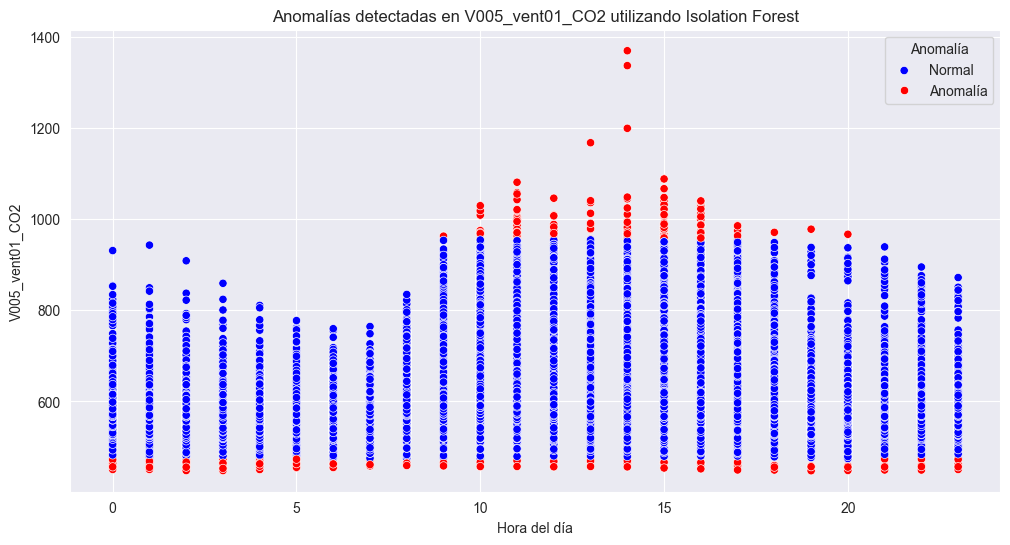

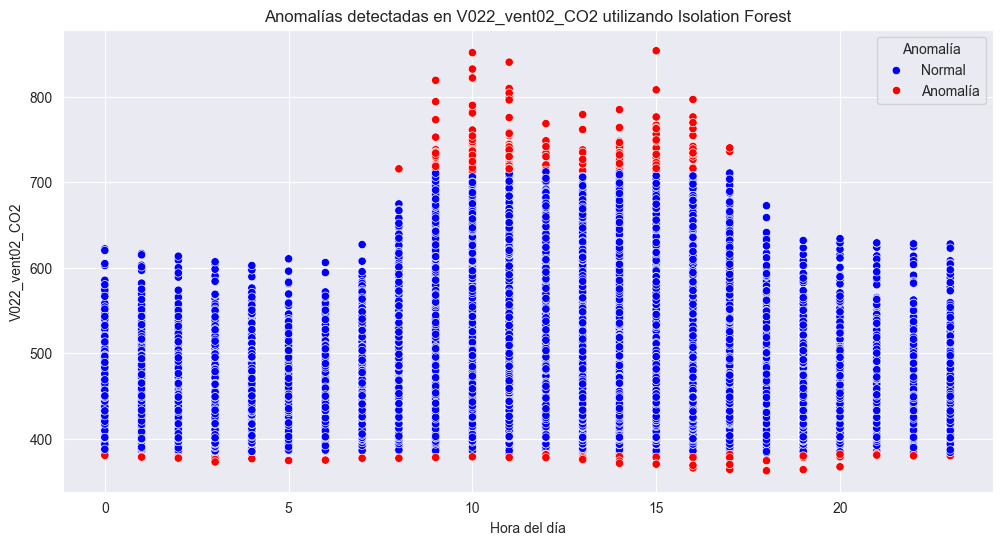

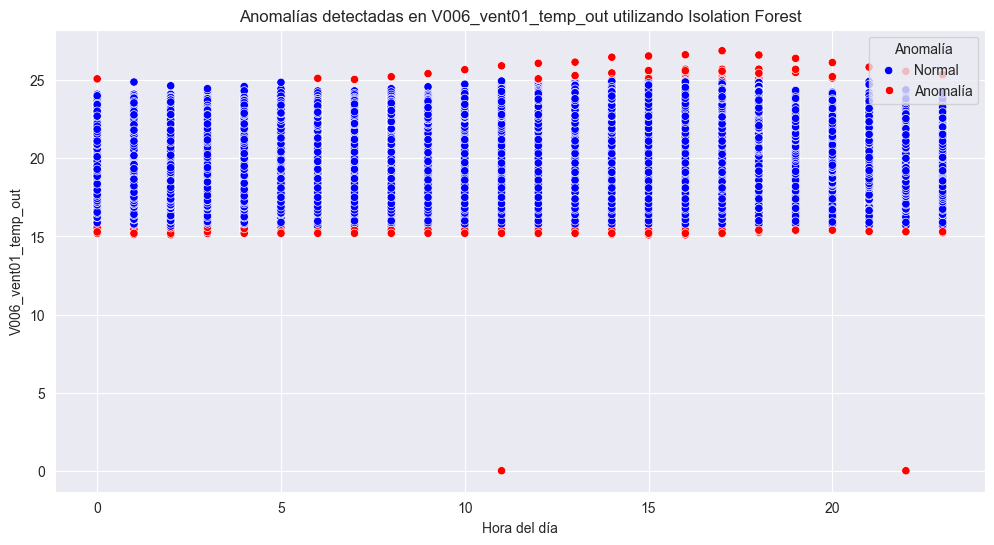

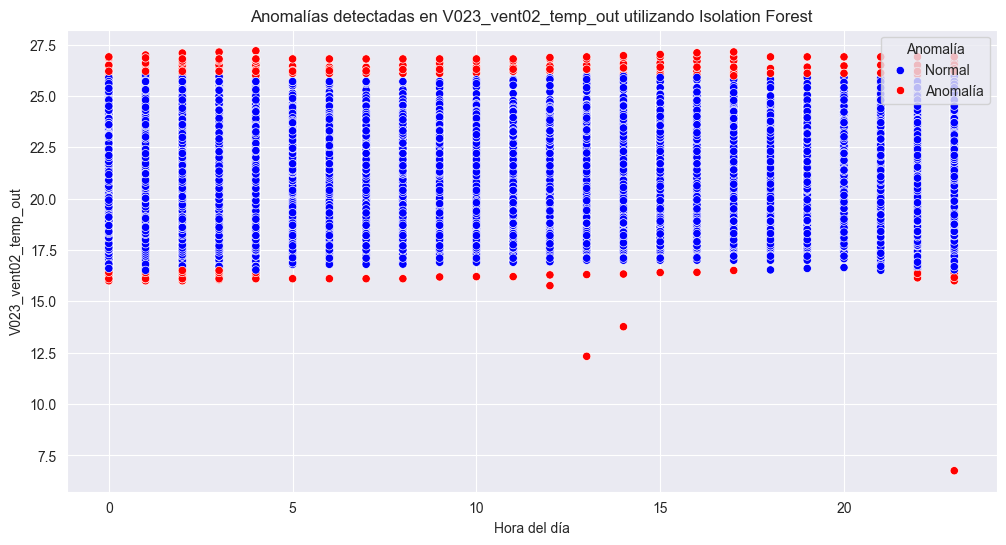

In [57]:

# Aplicar Isolation Forest para detectar anomalías
def detect_anomalies_with_isolation_forest(variable_data):
    # Crear un modelo de Isolation Forest
    isolation_forest = IsolationForest(contamination=0.01, random_state=42)
    # Ajustar el modelo y predecir las anomalías
    anomaly_labels = isolation_forest.fit_predict(variable_data.values.reshape(-1, 1))

    # El modelo asigna -1 a las anomalías y 1 a los puntos normales
    return anomaly_labels


# Aplicar Isolation Forest para cada variable
for var in variables:
    print(f'Aplicando Isolation Forest para detectar anomalías en {var}')
    anomaly_labels = detect_anomalies_with_isolation_forest(df_cleaned[var])

    # Utilizar loc[] para evitar el SettingWithCopyWarning
    df_cleaned.loc[:, f'{var}_anomalies'] = anomaly_labels

    # Contar el número de anomalías detectadas
    num_anomalies = np.sum(anomaly_labels == -1)
    print(f"Anomalías detectadas para {var}: {num_anomalies}")
    print("\n")

for var in variables:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='hour', y=var, hue=f'{var}_anomalies', data=df_cleaned, palette={1: "blue", -1: "red"})
    plt.title(f'Anomalías detectadas en {var} utilizando Isolation Forest')
    plt.xlabel('Hora del día')
    plt.ylabel(var)
    plt.legend(title='Anomalía', loc='upper right', labels=['Normal', 'Anomalía'])
    plt.show()



## LITERAL D

In [41]:
# Definir los pares de variables para el análisis multivariable
NE_variables = ['V005_vent01_CO2', 'V006_vent01_temp_out']
SW_variables = ['V022_vent02_CO2', 'V023_vent02_temp_out']

In [42]:
# Se dividen los datos normalizados para el análisis multivariable
scaled_NE_data = scaled_data[:, [0, 2]]  # Seleccionar CO2 y temperatura para NE
scaled_SW_data = scaled_data[:, [1, 3]]  # Seleccionar CO2 y temperatura para SW
ZONAS = [scaled_NE_data, scaled_SW_data]

# INTENTO PCA

In [43]:
# Aplicar PCA para reducir las dos variables en una sola componente principal
def apply_pca_and_cluster(zone_name, scaled_data, n_components = 2):
    # Primero se aplica PCA
    pca = PCA(n_components = n_components)
    pca_result = pca.fit_transform(scaled_data)

    # Agregar los resultados de PCA al dataframe original
    df_cleaned[f'PCA1_{zone_name}'] = pca_result[:, 0]
    df_cleaned[f'PCA2_{zone_name}'] = pca_result[:, 1] if n_components > 1 else None

    # Se visualiza la varianza explicada por cada componente
    print(f"Varianza explicada por cada componente en {zone_name}: {pca.explained_variance_ratio_}")

    # Se visualiza los resultados de PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = f'PCA1_{zone_name}', y = f'PCA2_{zone_name}', hue = 'hour', palette = 'coolwarm', data = df_cleaned, s = 60)
    plt.title(f'Resultados de PCA en {zone_name} (coloreado por hora)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

    return pca_result

Varianza explicada por cada componente en Norte_Este: [0.64972606 0.35027394]


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\2678750561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'PCA1_{zone_name}'] = pca_result[:, 0]
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\2678750561.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'PCA2_{zone_name}'] = pca_result[:, 1] if n_components > 1 else None


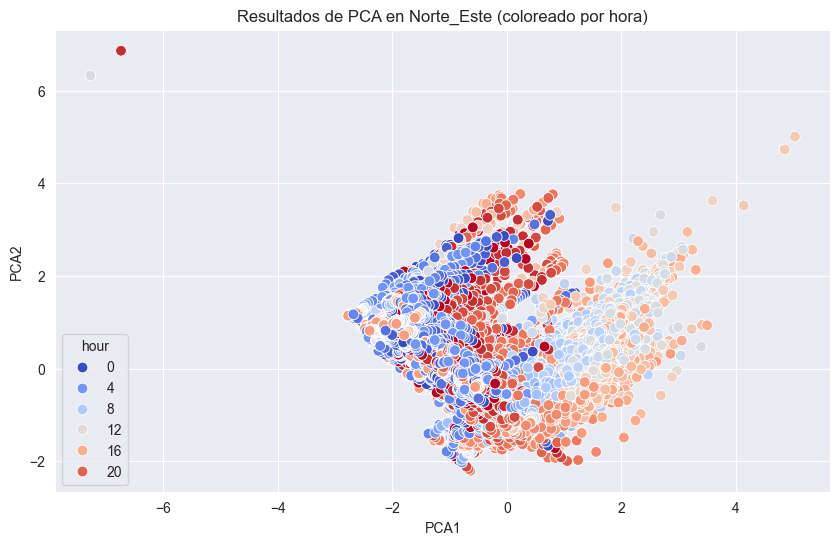

C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\2678750561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'PCA1_{zone_name}'] = pca_result[:, 0]
C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\2678750561.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'PCA2_{zone_name}'] = pca_result[:, 1] if n_components > 1 else None


Varianza explicada por cada componente en Sur_Oeste: [0.59666274 0.40333726]


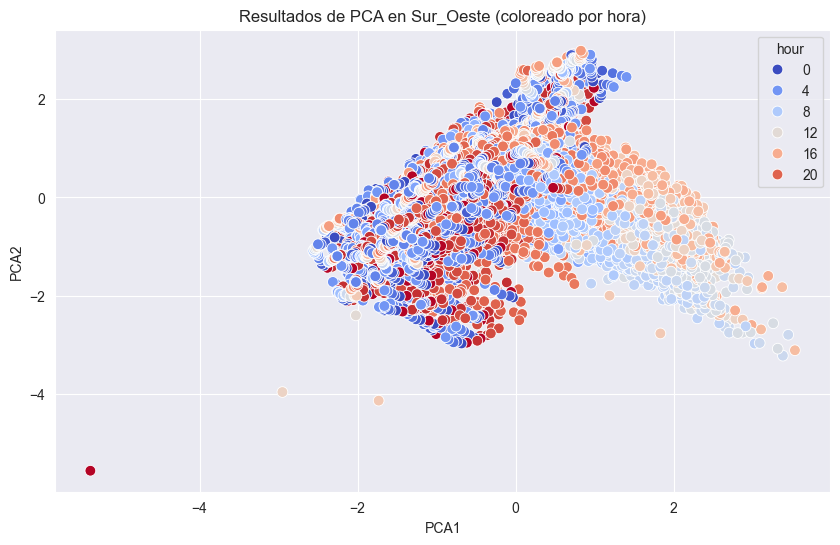

In [44]:
# Se aplica PCA para las zonas Norte Este y Sur Oeste
pca_north_east = apply_pca_and_cluster('Norte_Este', scaled_NE_data)
pca_south_west = apply_pca_and_cluster('Sur_Oeste', scaled_SW_data)


# ____________________________________________________________________________________

### Método 1: K-Means

### Cálculo del mejor número de clusters para cada zona utilizando el índice de silueta

In [45]:
# Se calcula la métrica índice de silueta para varios valores de k para cada zona
for zone in ZONAS:
    if np.array_equal(zone, scaled_NE_data):
        Zona = 'Zona NE'
    elif np.array_equal(zone, scaled_SW_data):
        Zona = 'Zona SW'  

    silhouette_scores_dict= {}
    for k in range(2, 8):
        kmeans_prueba = KMeans(n_clusters = k, random_state = 42)        
        kmeans_labels_prueba = kmeans_prueba.fit_predict(zone)
        silhouette_avg = silhouette_score(zone, kmeans_labels_prueba) 
        silhouette_scores_dict[k] = silhouette_avg
        print(f'Para {Zona} con k = {k} -> índice de silueta = {silhouette_avg:.3f}')
    best_k = max(silhouette_scores_dict, key = silhouette_scores_dict.get)    
    print(f'Mejor número de clusters: {best_k}')
    print('\n___________________________________________________________________________________________________\n')   

Para Zona NE con k = 2 -> índice de silueta = 0.400
Para Zona NE con k = 3 -> índice de silueta = 0.510
Para Zona NE con k = 4 -> índice de silueta = 0.420
Para Zona NE con k = 5 -> índice de silueta = 0.404
Para Zona NE con k = 6 -> índice de silueta = 0.402
Para Zona NE con k = 7 -> índice de silueta = 0.362
Mejor número de clusters: 3

___________________________________________________________________________________________________

Para Zona SW con k = 2 -> índice de silueta = 0.362
Para Zona SW con k = 3 -> índice de silueta = 0.505
Para Zona SW con k = 4 -> índice de silueta = 0.413
Para Zona SW con k = 5 -> índice de silueta = 0.392
Para Zona SW con k = 6 -> índice de silueta = 0.354
Para Zona SW con k = 7 -> índice de silueta = 0.351
Mejor número de clusters: 3

___________________________________________________________________________________________________



In [46]:
# K-Means clustering para cada par de variables (por zona)
def kmeans_cluster(scaled_data):
    kmeans = KMeans(n_clusters = 3)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    return kmeans_labels

### Se aplica K-Means clustering a cada par de variables por separado

#### K-Means para la zona NE

In [47]:
# Se obtiene el array de etiquetas para el par de variables (CO2 y temperatura) de la zona NE
labels_KMeans_NE = kmeans_cluster(scaled_NE_data)
# Se obtiene los valores únicos de etiqueta para cada variable
val_unicos_KMeans_NE = np.unique(labels_KMeans_NE)
# Se cuenta el número de valores únicos para cada variable
num_val_unicos_KMeans_NE = len(val_unicos_KMeans_NE)
print(f'Para la zona NE tenemos {num_val_unicos_KMeans_NE} etiquetas diferentes que son: {val_unicos_KMeans_NE}')
# Se agregan los resultados de K-Means clustering de cada variable al dataframe
df_cleaned['KMeans_NE'] = labels_KMeans_NE

Para la zona NE tenemos 3 etiquetas diferentes que son: [0 1 2]


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\660473399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['KMeans_NE'] = labels_KMeans_NE


#### K-Means para la zona SW

In [48]:
# Se obtiene el array de etiquetas para el par de variables (CO2 y temperatura) de la zona SW
labels_KMeans_SW = kmeans_cluster(scaled_SW_data)
# Se obtiene los valores únicos de etiqueta para cada variable
val_unicos_KMeans_SW = np.unique(labels_KMeans_SW)
# Se cuenta el número de valores únicos para cada variable
num_val_unicos_KMeans_SW = len(val_unicos_KMeans_SW)
print(f'Para la zona SW tenemos {num_val_unicos_KMeans_SW} etiquetas diferentes que son: {val_unicos_KMeans_SW}')
# Se agregan los resultados de K-Means clustering de cada variable al dataframe
df_cleaned['KMeans_SW'] = labels_KMeans_SW

Para la zona SW tenemos 3 etiquetas diferentes que son: [0 1 2]


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\1102703852.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['KMeans_SW'] = labels_KMeans_SW


In [49]:
df_cleaned

,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,day,semana,hour,V005_vent01_CO2_labels,V022_vent02_CO2_labels,...,KMeans_cluster_V005_vent01_CO2,KMeans_cluster_V022_vent02_CO2,KMeans_cluster_V006_vent01_temp_out,KMeans_cluster_V023_vent02_temp_out,PCA1_Norte_Este,PCA2_Norte_Este,PCA1_Sur_Oeste,PCA2_Sur_Oeste,KMeans_NE,KMeans_SW
0,2012-06-23 01:00:00,494.172532,405.514287,22.700000,23.449972,175,5,1,0,0,...,1,0,0,0,-0.670879,-1.533816,-0.287690,1.426291,1,2
1,2012-06-23 02:00:00,491.992574,404.705170,22.700000,23.400000,175,5,2,0,0,...,1,0,0,0,-0.686130,-1.549067,-0.313314,1.415754,1,2
2,2012-06-23 03:00:00,490.003467,401.981443,22.628444,23.400000,175,5,3,0,0,...,1,0,0,0,-0.722844,-1.540183,-0.338708,1.441148,1,2
3,2012-06-23 04:00:00,490.972327,402.471192,22.600000,23.400000,175,5,4,0,0,...,1,0,0,0,-0.725129,-1.524342,-0.334142,1.436582,1,2
4,2012-06-23 05:00:00,489.132106,403.174487,22.600000,23.349972,175,5,5,0,0,...,1,0,0,0,-0.738002,-1.537216,-0.345685,1.411925,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,2015-06-08 19:00:00,624.063257,533.007180,22.557156,23.154668,159,0,19,2,3,...,1,1,0,0,0.192287,-0.579625,0.794124,0.130791,1,1
25938,2015-06-08 20:00:00,621.028671,523.581086,21.732667,23.009318,159,0,20,2,2,...,1,0,0,0,-0.091640,-0.338156,0.653653,0.166085,1,2
25939,2015-06-08 21:00:00,617.569761,518.422520,21.530667,22.900015,159,0,21,2,2,...,1,0,0,0,-0.180199,-0.297993,0.566012,0.174634,1,2
25940,2015-06-08 22:00:00,615.949610,516.342616,21.500000,22.867806,159,0,22,2,2,...,1,0,0,0,-0.201304,-0.299556,0.534967,0.182372,1,2


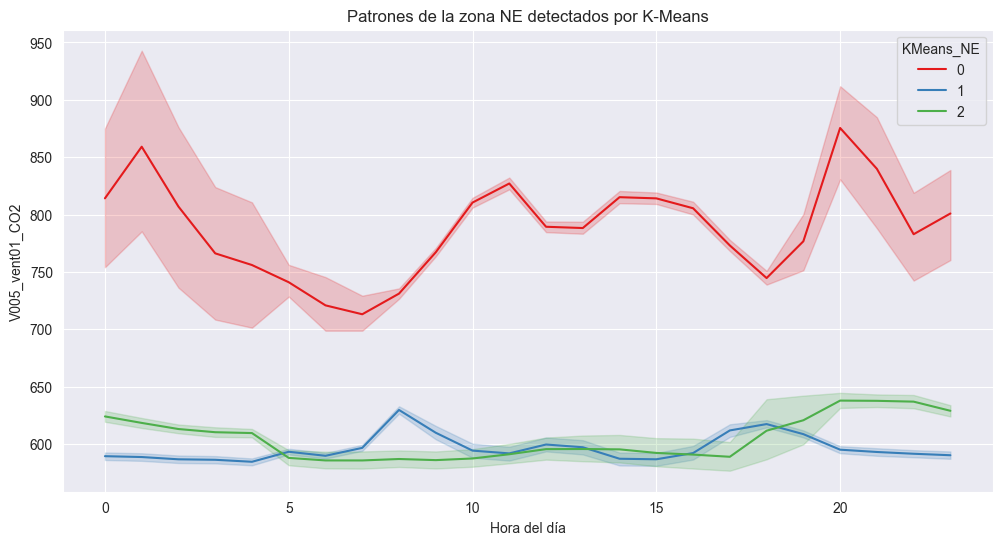

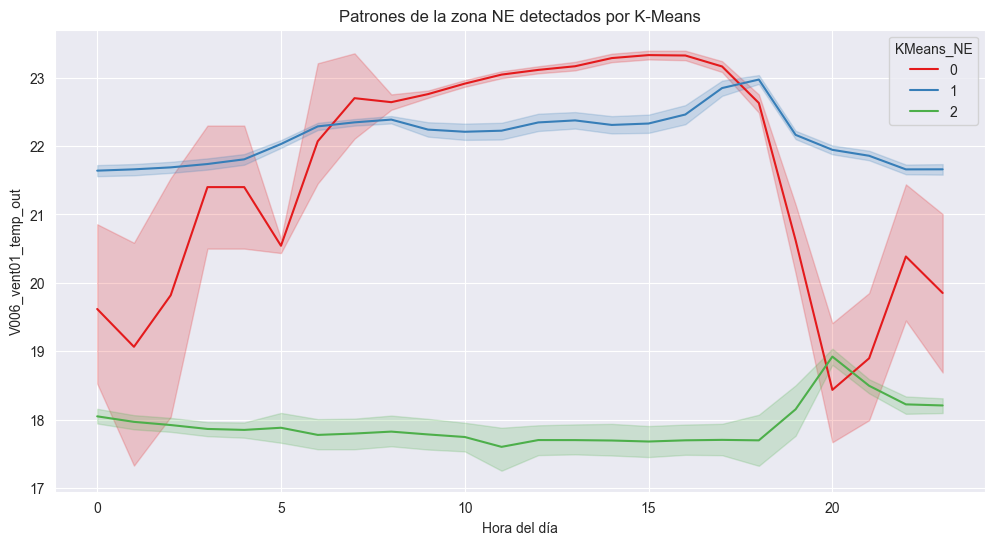

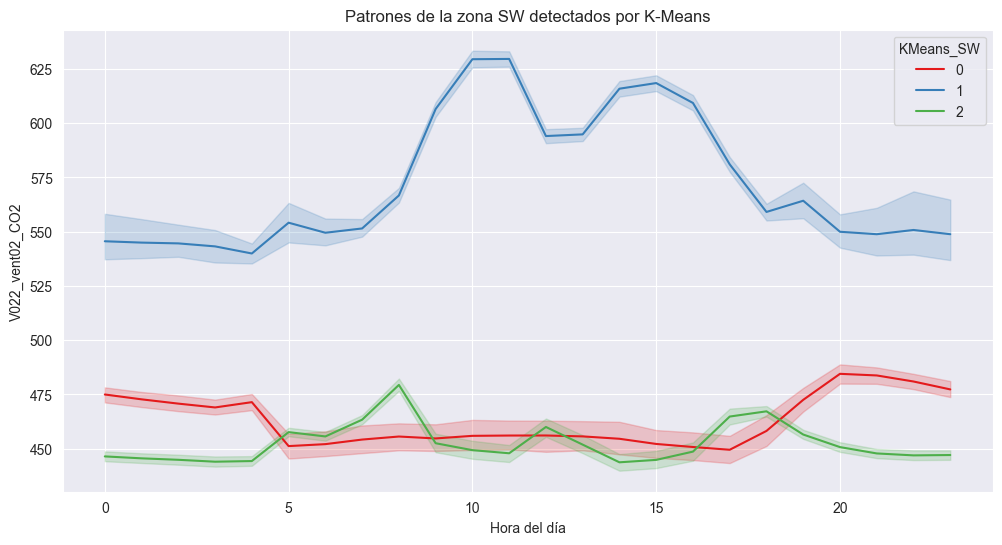

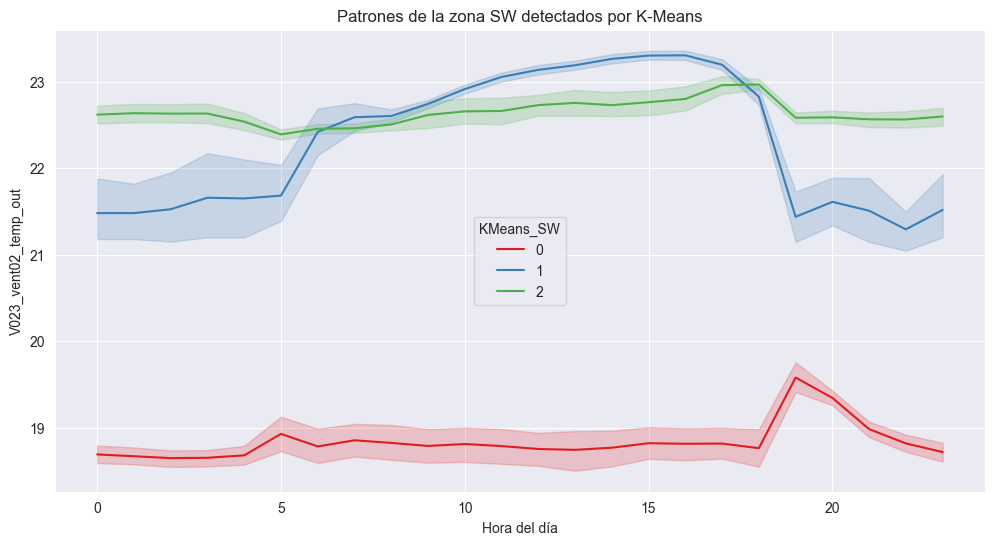

In [50]:
# Graficar los patrones multivariables detectados por K-Means
for var in NE_variables:    
    plt.figure(figsize = (12, 6))
    sns.lineplot(x = 'hour', y = var, hue = 'KMeans_NE', data = df_cleaned, palette = 'Set1')
    plt.title(f'Patrones de la zona NE detectados por K-Means')
    plt.xlabel('Hora del día')
    plt.ylabel(var)
    plt.show()


for var in SW_variables:
    plt.figure(figsize = (12, 6))
    sns.lineplot(x = 'hour', y = var, hue = 'KMeans_SW', data = df_cleaned, palette = 'Set1')
    plt.title(f'Patrones de la zona SW detectados por K-Means')
    plt.xlabel('Hora del día')
    plt.ylabel(var)
    plt.show()    

### Método 2: DBSCAN

In [51]:
# DBSCAN clustering para cada par de variables (por zona)
def dbscan_cluster(scaled_data):
    dbscan = DBSCAN(eps = 1.2, min_samples = 3)
    dbscan_labels = dbscan.fit_predict(scaled_data)

    return dbscan_labels

### Cálculo de los mejores parámetros de DBSCAN para cada zona 

In [52]:
for zone in ZONAS:
    if np.array_equal(zone, scaled_NE_data):
        Zona = 'Zona NE'
    elif np.array_equal(zone, scaled_SW_data):
        Zona = 'Zona SW'

    # Se prueba distintos valores de eps y min_samples para cada zona
    eps_values = [0.5,1.0, 1.2, 1.3, 1.5]
    min_samples_values = [2, 3, 5, 7]

    best_eps = None
    best_min_samples = None
    best_silhouette = -1

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps = eps, min_samples = min_samples)
            dbscan_labels = dbscan.fit_predict(zone)
            if len(set(dbscan_labels)) > 1:  # Asegurarse de que haya más de un cluster
                silhouette_avg = silhouette_score(zone, dbscan_labels)
                print(f"DBSCAN: eps = {eps}, min_samples = {min_samples}, índice de silueta ={ silhouette_avg:.4f}")
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples

    print(f'{Zona} \nMejores parámetros para DBSCAN: eps = {best_eps}, min_samples = {best_min_samples}')
    print('\n___________________________________________________________________________________________________\n')     

DBSCAN: eps = 0.5, min_samples = 2, índice de silueta =0.7265
DBSCAN: eps = 0.5, min_samples = 3, índice de silueta =0.7426
DBSCAN: eps = 0.5, min_samples = 5, índice de silueta =0.7426
DBSCAN: eps = 0.5, min_samples = 7, índice de silueta =0.7120
DBSCAN: eps = 1.0, min_samples = 2, índice de silueta =0.7394
DBSCAN: eps = 1.0, min_samples = 3, índice de silueta =0.7894
DBSCAN: eps = 1.0, min_samples = 5, índice de silueta =0.7736
DBSCAN: eps = 1.0, min_samples = 7, índice de silueta =0.7736
DBSCAN: eps = 1.2, min_samples = 2, índice de silueta =0.7394
DBSCAN: eps = 1.2, min_samples = 3, índice de silueta =0.7894
DBSCAN: eps = 1.2, min_samples = 5, índice de silueta =0.7894
DBSCAN: eps = 1.2, min_samples = 7, índice de silueta =0.7894
DBSCAN: eps = 1.3, min_samples = 2, índice de silueta =0.7394
DBSCAN: eps = 1.3, min_samples = 3, índice de silueta =0.7894
DBSCAN: eps = 1.3, min_samples = 5, índice de silueta =0.7894
DBSCAN: eps = 1.3, min_samples = 7, índice de silueta =0.7894
DBSCAN: 

### Se aplica DBSCAN clustering a cada par de variables por separado

#### DBSCAN para la zona NE

In [53]:
# Se obtiene el array de etiquetas para el par de variables (CO2 y temperatura) de la zona NE
labels_DBSCAN_NE = dbscan_cluster(scaled_NE_data)
# Se obtiene los valores únicos de etiqueta para cada variable
val_unicos_dbscan_NE = np.unique(labels_DBSCAN_NE)
# Se cuenta el número de valores únicos para cada variable
num_val_unicos_dbscan_NE = len(val_unicos_dbscan_NE)
print(f'Para la zona NE tenemos {num_val_unicos_dbscan_NE} etiquetas diferentes que son: {val_unicos_dbscan_NE}')
# Se agregan los resultados de DBSCAN clustering de cada variable al dataframe
df_cleaned['DBSCAN_NE'] = labels_DBSCAN_NE

Para la zona NE tenemos 2 etiquetas diferentes que son: [-1  0]


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\3861624310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DBSCAN_NE'] = labels_DBSCAN_NE


#### DBSCAN para la zona SW

In [54]:
# Se obtiene el array de etiquetas para el par de variables (CO2 y temperatura) de la zona SW
labels_DBSCAN_SW = dbscan_cluster(scaled_SW_data)
# Se obtiene los valores únicos de etiqueta para cada variable
val_unicos_dbscan_SW = np.unique(labels_DBSCAN_SW)
# Se cuenta el número de valores únicos para cada variable
num_val_unicos_dbscan_SW = len(val_unicos_dbscan_SW)
print(f'Para la zona SW tenemos {num_val_unicos_dbscan_SW} etiquetas diferentes que son: {val_unicos_dbscan_SW}')
# Se agregan los resultados de DBSCAN clustering de cada variable al dataframe
df_cleaned['DBSCAN_SW'] = labels_DBSCAN_SW

Para la zona SW tenemos 2 etiquetas diferentes que son: [-1  0]


C:\Users\jairc\AppData\Local\Temp\ipykernel_17168\3955132139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DBSCAN_SW'] = labels_DBSCAN_SW


In [55]:
df_cleaned

,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,day,semana,hour,V005_vent01_CO2_labels,V022_vent02_CO2_labels,...,KMeans_cluster_V006_vent01_temp_out,KMeans_cluster_V023_vent02_temp_out,PCA1_Norte_Este,PCA2_Norte_Este,PCA1_Sur_Oeste,PCA2_Sur_Oeste,KMeans_NE,KMeans_SW,DBSCAN_NE,DBSCAN_SW
0,2012-06-23 01:00:00,494.172532,405.514287,22.700000,23.449972,175,5,1,0,0,...,0,0,-0.670879,-1.533816,-0.287690,1.426291,1,2,0,0
1,2012-06-23 02:00:00,491.992574,404.705170,22.700000,23.400000,175,5,2,0,0,...,0,0,-0.686130,-1.549067,-0.313314,1.415754,1,2,0,0
2,2012-06-23 03:00:00,490.003467,401.981443,22.628444,23.400000,175,5,3,0,0,...,0,0,-0.722844,-1.540183,-0.338708,1.441148,1,2,0,0
3,2012-06-23 04:00:00,490.972327,402.471192,22.600000,23.400000,175,5,4,0,0,...,0,0,-0.725129,-1.524342,-0.334142,1.436582,1,2,0,0
4,2012-06-23 05:00:00,489.132106,403.174487,22.600000,23.349972,175,5,5,0,0,...,0,0,-0.738002,-1.537216,-0.345685,1.411925,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,2015-06-08 19:00:00,624.063257,533.007180,22.557156,23.154668,159,0,19,2,3,...,0,0,0.192287,-0.579625,0.794124,0.130791,1,1,0,0
25938,2015-06-08 20:00:00,621.028671,523.581086,21.732667,23.009318,159,0,20,2,2,...,0,0,-0.091640,-0.338156,0.653653,0.166085,1,2,0,0
25939,2015-06-08 21:00:00,617.569761,518.422520,21.530667,22.900015,159,0,21,2,2,...,0,0,-0.180199,-0.297993,0.566012,0.174634,1,2,0,0
25940,2015-06-08 22:00:00,615.949610,516.342616,21.500000,22.867806,159,0,22,2,2,...,0,0,-0.201304,-0.299556,0.534967,0.182372,1,2,0,0
